In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [174]:
df= pd.read_csv("games.csv")

In [175]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [177]:
df.shape

(20058, 16)

In [178]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [179]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [180]:
df = df.loc[df.turns > 2]
print('Number of games now: ', df.shape[0])
df.head()

Number of games now:  19855


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [181]:
df.opening_name.value_counts()

Sicilian Defense                                                                         348
Van't Kruijs Opening                                                                     342
Sicilian Defense: Bowdler Attack                                                         296
French Defense: Knight Variation                                                         271
Scotch Game                                                                              271
                                                                                        ... 
English Opening: Jaenisch Gambit                                                           1
English Opening: Symmetrical Variation |  Botvinnik System Reversed                        1
English Opening: King's English Variation |  Two Knights Variation |  Keres Variation      1
Neo-Gruenfeld Defense                                                                      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation          

In [182]:
class ChessFunctions:
    def FirstTwoMoves(moves):
        splitted = moves.split(maxsplit=2)
        return splitted[0], splitted[1]
    
    def FormatIncrementCode(inc):
        splitted = inc.split('+')
        return int(splitted[0])
    
    def CategorizeTime(inc):
        if inc < 3:
            return 'bullet'
        elif inc < 9:
            return 'blitz'
        elif inc < 16:
            return 'rapid'
        else:
            return 'classical'

In [183]:
df['increment_code'] = np.vectorize(ChessFunctions.FormatIncrementCode)(df['increment_code'])
df['increment_code'].head()

0    15
1     5
2     5
3    20
4    30
Name: increment_code, dtype: int32

In [184]:
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [185]:
df['format'] = np.vectorize(ChessFunctions.CategorizeTime)(df['increment_code'])
df['format'].head(5)


0        rapid
1        blitz
2        blitz
3    classical
4    classical
Name: format, dtype: object

In [186]:


# Define the rating ranges
rating_ranges = [
    (700, 1500),
    (1501, 2200),
    (2201, 2700)
]

# Create a function to categorize ratings into ranges
def categorize_rating(rating):
    for low, high in rating_ranges:
        if low <= rating <= high:
            return f'{low}-{high}'

# Apply the categorize_rating function to create a new column 'rating_range'
df['rating_range'] = df['white_rating'].apply(categorize_rating)

# Filter the DataFrame for the specified rating ranges
filtered_df = df[df['rating_range'].notnull()]

# Group by 'rating_range' and 'Opening Name', count occurrences, and sort
opening_counts = (
    filtered_df.groupby(['rating_range', 'opening_name'])
    .size()
    .reset_index(name='count')
)

# For each rating range, find the most common openings
top_openings = opening_counts.groupby('rating_range', group_keys=False).apply(lambda x: x.nlargest(1000, 'count'))

# Filter the DataFrame to include only the rows for the target opening
target_counts = opening_counts[opening_counts['opening_name'] == "Van't Kruijs Opening" ]

# Display the results
print(target_counts)


     rating_range          opening_name  count
1256    1501-2200  Van't Kruijs Opening     66
2471     700-1500  Van't Kruijs Opening    276


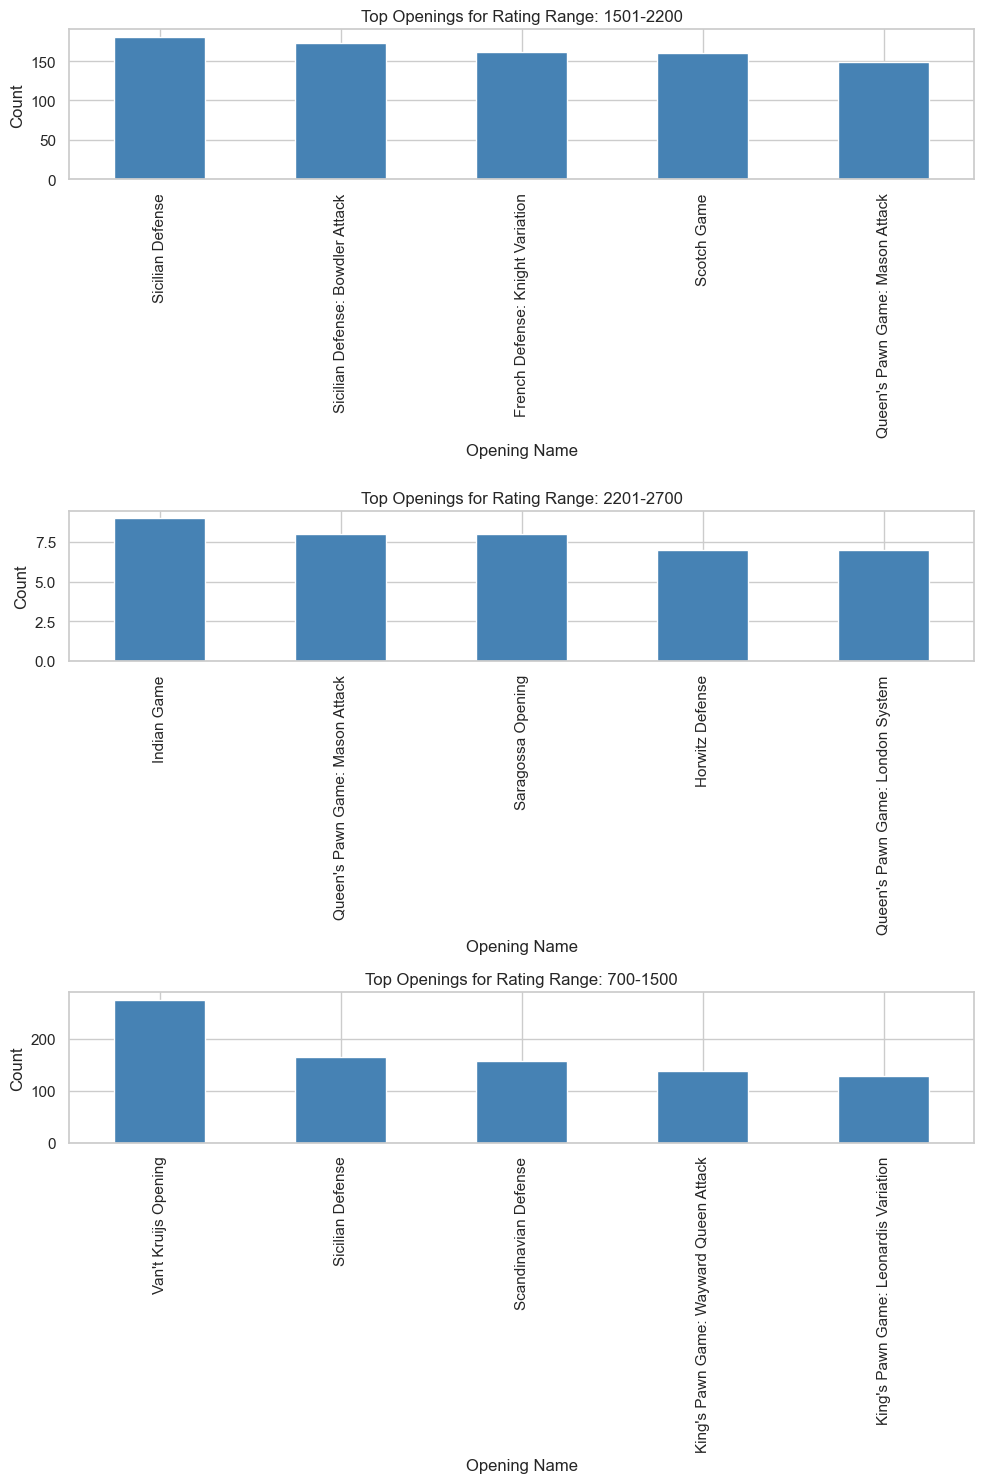

In [187]:
top_openings = opening_counts.groupby('rating_range', group_keys=False).apply(lambda x: x.nlargest(5, 'count'))
num_rating_ranges = len(top_openings['rating_range'].unique())
fig, axes = plt.subplots(nrows=num_rating_ranges, figsize=(10, 5*num_rating_ranges))

# Iterate through each rating range and create a bar plot
for i, (rating_range, data) in enumerate(top_openings.groupby('rating_range')):
    ax = axes[i]
    data.plot(kind='bar', x='opening_name', y='count', ax=ax, color='steelblue')
    ax.set_title(f"Top Openings for Rating Range: {rating_range}")
    ax.set_xlabel('Opening Name')
    ax.set_ylabel('Count')
    ax.legend().set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [188]:
rating_counts = (
    filtered_df.groupby('rating_range')
    .size()
    .reset_index(name='count')
)

# Display the results
print(rating_counts)

  rating_range  count
0    1501-2200  11242
1    2201-2700    566
2     700-1500   8047


In [189]:
# Create a boolean mask for rows to be removed
mask = (df['white_rating'] >= 2200) & (df['white_rating'] <= 2700)

# Remove the rows that match the mask
df_filtered = df[~mask]
df_filtered

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,format,rating_range
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,rapid,700-1500
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,blitz,700-1500
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,blitz,700-1500
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,classical,700-1500
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,classical,1501-2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,rapid,1501-2200
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,rapid,700-1500
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,rapid,700-1500
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,rapid,700-1500


In [190]:
## Rated = 1, Not rated = 0
df['rated_bin'] = np.where(df['rated'] == True, 1, 0)
## White = 1, Black = 0
df['winner_bin'] = np.where(df['winner'] == 'white', 1, 0)

In [191]:
df.drop(["rated", "winner"], axis = 1)

,id,created_at,last_move_at,turns,victory_status,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,format,rating_range,rated_bin,winner_bin
0,TZJHLljE,1.504210e+12,1.504210e+12,13,outoftime,15,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,rapid,700-1500,0,1
1,l1NXvwaE,1.504130e+12,1.504130e+12,16,resign,5,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,blitz,700-1500,1,0
2,mIICvQHh,1.504130e+12,1.504130e+12,61,mate,5,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,blitz,700-1500,1,1
3,kWKvrqYL,1.504110e+12,1.504110e+12,61,mate,20,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,classical,700-1500,1,1
4,9tXo1AUZ,1.504030e+12,1.504030e+12,95,mate,30,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,classical,1501-2200,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,1.499791e+12,1.499791e+12,24,resign,10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,rapid,1501-2200,1,1
20054,WSJDhbPl,1.499698e+12,1.499699e+12,82,mate,10,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,rapid,700-1500,1,0
20055,yrAas0Kj,1.499698e+12,1.499698e+12,35,mate,10,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,rapid,700-1500,1,1
20056,b0v4tRyF,1.499696e+12,1.499697e+12,109,resign,10,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,rapid,700-1500,1,1


In [192]:
df.id.value_counts()

XRuQPSzH    5
VgNt0SSX    4
I8odmGjb    4
facMwkUo    4
j5KY62yS    4
           ..
f9UkUOBY    1
CLc6myYw    1
fwVvDm3Z    1
qzgu5zf3    1
N8G2JHGG    1
Name: id, Length: 18919, dtype: int64

In [193]:
df.increment_code.value_counts()

10     9395
15     3361
5      1744
20      930
8       919
30      739
7       660
25      318
9       258
12      225
6       176
45      155
180     134
60      101
11       98
13       73
14       68
4        65
3        56
2        55
16       49
17       40
40       37
0        35
1        31
19       28
35       26
90       26
18       25
120      16
150       9
29        2
21        1
Name: increment_code, dtype: int64

In [194]:
df['created_at_dt'] = pd.to_datetime(df['created_at']/1000, 
                                        unit='s', 
                                        origin='unix')

df['last_move_at_dt'] = pd.to_datetime(df['last_move_at']/1000, 
                                          unit='s', 
                                          origin="unix")


In [195]:
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,moves,opening_eco,opening_name,opening_ply,format,rating_range,rated_bin,winner_bin,created_at_dt,last_move_at_dt
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15,bourgris,1500,...,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,rapid,700-1500,0,1,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5,a-00,1322,...,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,blitz,700-1500,1,0,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5,ischia,1496,...,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,blitz,700-1500,1,1,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20,daniamurashov,1439,...,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,classical,700-1500,1,1,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30,nik221107,1523,...,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,classical,1501-2200,1,1,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10,belcolt,1691,...,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,rapid,1501-2200,1,1,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10,jamboger,1233,...,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,rapid,700-1500,1,0,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10,jamboger,1219,...,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,rapid,700-1500,1,1,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10,marcodisogno,1360,...,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,rapid,700-1500,1,1,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872


In [196]:
df['game_len_dt'] = df['last_move_at_dt'] - df['created_at_dt']

df['game_len'] = df['last_move_at'] - df['created_at']

df['game_len_mins'] = df['game_len'].apply(lambda x: round(x / 1000 / 60, 2))

In [197]:
df["rating_diff"] = df["white_rating"]-df["black_rating"]
df["rating_diff"] = df["rating_diff"].apply(abs)

In [198]:
df["rating_diff"].describe()

count    19855.000000
mean       171.230169
std        177.359858
min          0.000000
25%         45.000000
50%        113.000000
75%        239.000000
max       1605.000000
Name: rating_diff, dtype: float64

In [199]:
pd.get_dummies(df, columns =["victory_status"], drop_first= True)

,id,rated,created_at,last_move_at,turns,winner,increment_code,white_id,white_rating,black_id,...,winner_bin,created_at_dt,last_move_at_dt,game_len_dt,game_len,game_len_mins,rating_diff,victory_status_mate,victory_status_outoftime,victory_status_resign
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,white,15,bourgris,1500,a-00,...,1,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,0 days 00:00:00,0.0,0.00,309,0,1,0
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,black,5,a-00,1322,skinnerua,...,0,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00,61,0,0,1
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,white,5,ischia,1496,a-00,...,1,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00,4,1,0,0
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,white,20,daniamurashov,1439,adivanov2009,...,1,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,0 days 00:00:00,0.0,0.00,15,1,0,0
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,white,30,nik221107,1523,adivanov2009,...,1,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000,0 days 00:00:00,0.0,0.00,54,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,white,10,belcolt,1691,jamboger,...,1,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000,0 days 00:05:21.733999872,321734.0,5.36,471,0,0,1
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,black,10,jamboger,1233,farrukhasomiddinov,...,0,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064,0 days 00:12:24.219000064,744219.0,12.40,37,1,0,0
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,white,10,jamboger,1219,schaaksmurf3,...,1,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808,0 days 00:02:52.833999872,172834.0,2.88,67,1,0,0
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,white,10,marcodisogno,1360,jamboger,...,1,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872,0 days 00:15:46.698999808,946699.0,15.78,133,0,0,1


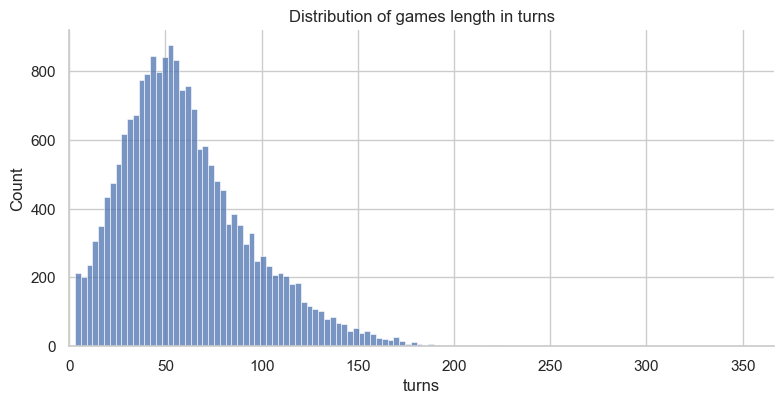

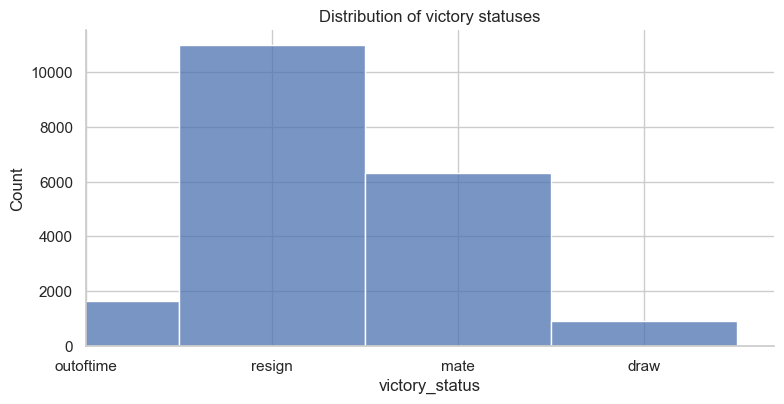

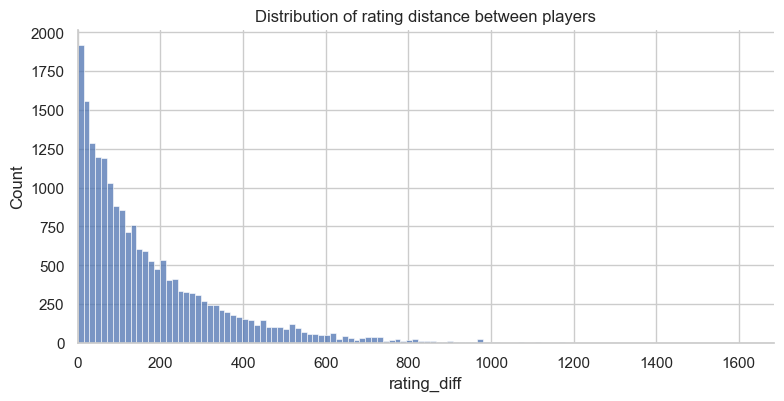

In [200]:
to_plot = [
    ('turns', 'Distribution of games length in turns'),
    ('victory_status', 'Distribution of victory statuses'),
    ('rating_diff', 'Distribution of rating distance between players')
]

for var, title in to_plot:
    sns.displot(
        df[var],
        
        height=4, 
        aspect=2
    )
    
    plt.title(title)
    plt.xlim((0))
    plt.ylim((0))
    
    plt.show()

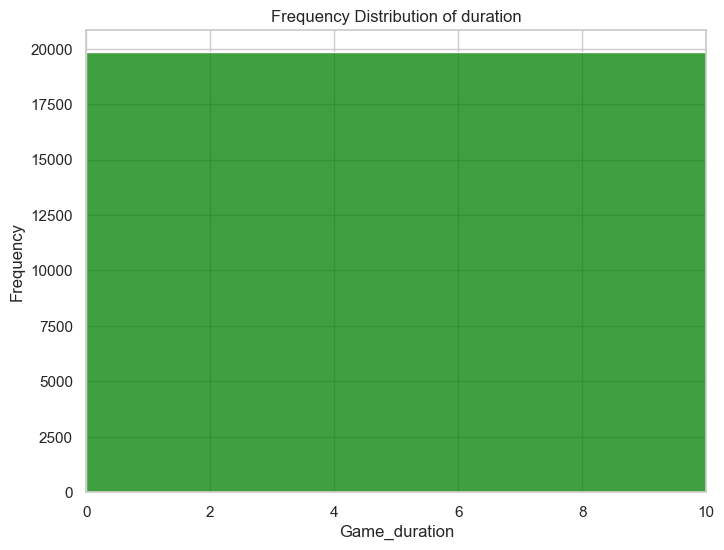

In [201]:
sns.set(style="whitegrid")

# Plot the frequency distribution using seaborn
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='game_len_mins', bins=10, kde=False, color='green')  # Adjust as needed
plt.xlim(0,10)
plt.xlabel('Game_duration')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of duration')
plt.show()

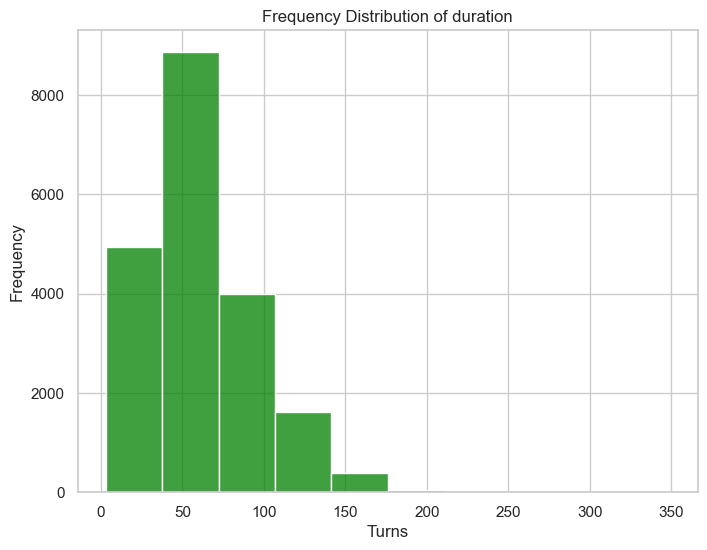

In [202]:
sns.set(style="whitegrid")

# Plot the frequency distribution using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='turns', bins=10, kde=False, color='green')  # Adjust as needed
plt.xlabel('Turns')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of duration')
plt.show()

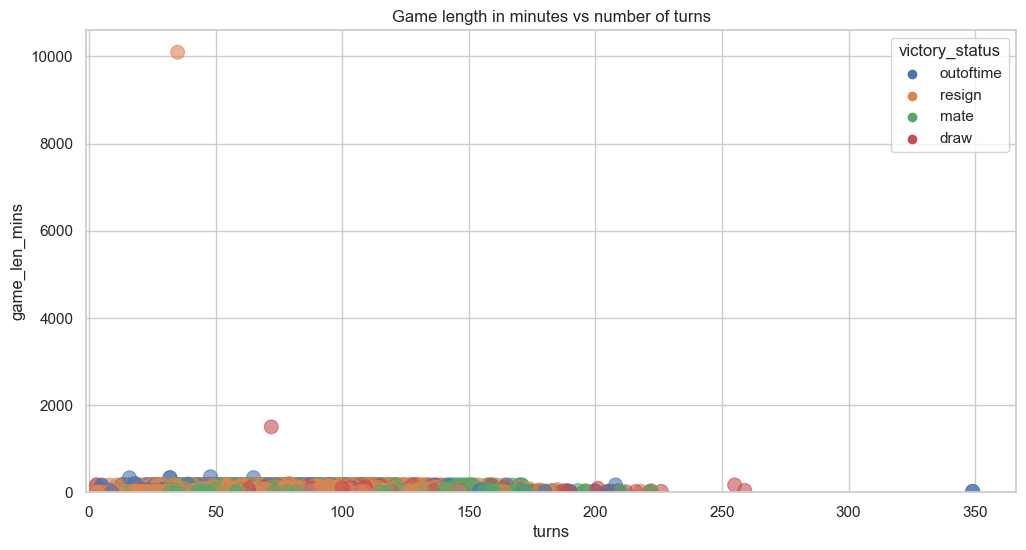

In [203]:
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df,
    x='turns',
    y='game_len_mins',
    s=100,
    hue='victory_status',
    
    edgecolor=None,
    alpha=0.6,
    legend=True
)

plt.title('Game length in minutes vs number of turns')
plt.xlim((-1))
plt.ylim((-1))

plt.show()

In [204]:
df["rating_adv"]= df["white_rating"]-df["black_rating"]
df["rating_adv"]

0        309
1         61
2         -4
3        -15
4         54
        ... 
20053    471
20054     37
20055    -67
20056    133
20057   -104
Name: rating_adv, Length: 19855, dtype: int64

In [205]:
filtered_df = df[df['rating_adv'] < 0]
filtered_df
# sns.set(style="whitegrid")
# # Check if there are any rows to proceed with
# if not filtered_df.empty:
#     # Create a bar plot for filtered data
#     plt.figure(figsize=(8, 6))
#     sns.barplot(data=filtered_df, x='rating_adv', y='winner_bin')
    
#     plt.xlabel('rating_adv')
#     plt.ylabel('winner_bin')
#     plt.title('rating_adv > 0')
#     plt.show()
# else:
#     print("No data points with Rating Advantage > 0.")

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,rating_range,rated_bin,winner_bin,created_at_dt,last_move_at_dt,game_len_dt,game_len,game_len_mins,rating_diff,rating_adv
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5,ischia,1496,...,700-1500,1,1,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00,4,-4
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20,daniamurashov,1439,...,700-1500,1,1,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,0 days 00:00:00,0.0,0.00,15,-15
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15,daniel_likes_chess,1413,...,700-1500,0,0,2017-08-25 16:53:20.000000000,2017-08-25 16:53:20.000000000,0 days 00:00:00,0.0,0.00,695,-695
11,Vf5fKWzI,False,1.503350e+12,1.503350e+12,38,resign,black,20,daniel_likes_chess,1381,...,700-1500,0,0,2017-08-21 21:13:20.000000000,2017-08-21 21:13:20.000000000,0 days 00:00:00,0.0,0.00,486,-486
12,HRti5mKv,False,1.503350e+12,1.503350e+12,60,resign,black,5,daniel_likes_chess,1381,...,700-1500,0,0,2017-08-21 21:13:20.000000000,2017-08-21 21:13:20.000000000,0 days 00:00:00,0.0,0.00,555,-555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20043,Z490CURF,True,1.500156e+12,1.500156e+12,11,resign,white,10,jamboger,1252,...,700-1500,1,1,2017-07-15 21:57:08.796000000,2017-07-15 21:59:54.116000000,0 days 00:02:45.320000,165320.0,2.76,38,-38
20047,X0DJ1fJu,True,1.499870e+12,1.499871e+12,73,mate,white,10,jamboger,1222,...,700-1500,1,1,2017-07-12 14:29:43.677999872,2017-07-12 14:44:27.905999872,0 days 00:14:44.228000,884228.0,14.74,40,-40
20052,EopEqqAa,True,1.499812e+12,1.499812e+12,37,resign,white,10,jamboger,1219,...,700-1500,1,1,2017-07-11 22:24:07.779000064,2017-07-11 22:33:56.546000128,0 days 00:09:48.767000064,588767.0,9.81,31,-31
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10,jamboger,1219,...,700-1500,1,1,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808,0 days 00:02:52.833999872,172834.0,2.88,67,-67


In [206]:
df


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,rating_range,rated_bin,winner_bin,created_at_dt,last_move_at_dt,game_len_dt,game_len,game_len_mins,rating_diff,rating_adv
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15,bourgris,1500,...,700-1500,0,1,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000,0 days 00:00:00,0.0,0.00,309,309
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5,a-00,1322,...,700-1500,1,0,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00,61,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5,ischia,1496,...,700-1500,1,1,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000,0 days 00:00:00,0.0,0.00,4,-4
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20,daniamurashov,1439,...,700-1500,1,1,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000,0 days 00:00:00,0.0,0.00,15,-15
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30,nik221107,1523,...,1501-2200,1,1,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000,0 days 00:00:00,0.0,0.00,54,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10,belcolt,1691,...,1501-2200,1,1,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000,0 days 00:05:21.733999872,321734.0,5.36,471,471
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10,jamboger,1233,...,700-1500,1,0,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064,0 days 00:12:24.219000064,744219.0,12.40,37,37
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10,jamboger,1219,...,700-1500,1,1,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808,0 days 00:02:52.833999872,172834.0,2.88,67,-67
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10,marcodisogno,1360,...,700-1500,1,1,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872,0 days 00:15:46.698999808,946699.0,15.78,133,133


In [207]:
from sklearn.preprocessing import LabelEncoder     #Converting categorical data
LE = LabelEncoder()
df['victory_status_cat'] = LE.fit_transform(df['victory_status'])
df['rated_cat'] = LE.fit_transform(df['rated'])

In [208]:
df.drop(["victory_status","rated"], axis=1, inplace=True)

In [209]:
X = df.loc[:,("turns", "victory_status_cat", "rated_cat")]     #Dataset consisting only of features
y = df.loc[:,"winner_bin"] # 




In [210]:
#Dividing the dataset as 70% train, 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [211]:
#Training the model with the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [212]:
#Classification of the model with test data
y_test_dt = dt_model.predict(X_test)


In [213]:
#Demonstrating the classification prediction success of the model
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test, y_test_dt)
acc_dt

0.9004532482793353

In [214]:
#Training the model with the KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_model.fit(X_train, y_train)




KNeighborsClassifier()

In [215]:
#Classification of the model with test data
y_test_knn = knn_model.predict(X_test)

In [216]:
#Demonstrating the classification prediction success of the model
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_test, y_test_knn)
acc_knn

0.8781265737787477

In [217]:
from sklearn.naive_bayes import CategoricalNB
nb_model = CategoricalNB()
nb_model.fit(X_train, y_train)

CategoricalNB()

In [218]:
#Classification of the model with test data
y_test_nb = nb_model.predict(X_test)

In [219]:
#Demonstrating the classification prediction success of the model
from sklearn.metrics import accuracy_score
acc_nb = accuracy_score(y_test, y_test_nb)
acc_nb

0.9026355548094679